In [19]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the diabetes_w_in_24hr.csv.
import pandas as pd
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/ComfyKoala/diabetes-classification/main/Nikko/Resources/Diabetes_w_in_24hr.csv')
# Display the first few rows
diabetes_df.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


# Clean, Standardize, and Encode Categorical Data

In [20]:
# remove extra info
# reduced dataset to measurements taken within 24 hours (as opposed to only within the first hour after admission)
# simplified invasive/noninvasive/combined measurements to only the combined measurements
clean_diabetes_df = diabetes_df.drop(columns=['Unnamed: 0', 'encounter_id', 'hospital_id', 'elective_surgery', 'icu_admit_source', 'icu_id',
                                              'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
                                              'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min',
                                              'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_sysbp_invasive_max',
                                              'd1_sysbp_invasive_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_diasbp_invasive_max',
                                              'h1_diasbp_invasive_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
                                              'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min',
                                              'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min',
                                              'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max',
                                              'h1_sysbp_noninvasive_min', 'h1_temp_max', 'h1_temp_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max',
                                              'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
                                              'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max',
                                              'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max',
                                              'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max',
                                              'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max',
                                              'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'solid_tumor_with_metastasis'])



In [21]:
# count nulls, remove columns where null values exist for > 5000 of the rows
null_col_check = clean_diabetes_df.isnull().sum(axis=0)
null_col_check = null_col_check[null_col_check != 0][null_col_check > 5000]
remove_cols = []
for i, v in null_col_check.items():
  remove_cols.append(i)

clean_diabetes_df = clean_diabetes_df.drop(columns=remove_cols)

In [22]:
# then decide which columns to remove altogether and which rows to remove due to nulls
null_row_check = clean_diabetes_df.isnull().sum(axis=1)
null_row_check = null_row_check[null_row_check != 0]
remove_rows = []
for i, v in null_row_check.items():
  remove_rows.append(i)

clean_diabetes_df = clean_diabetes_df.drop(remove_rows, axis=0)

In [23]:
# scale numerical columns due to large differences in values
scaled_data = StandardScaler().fit_transform(clean_diabetes_df[['age', 'bmi', 'height', 'weight', 'gcs_eyes_apache', 'gcs_motor_apache',
                                                                'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'map_apache',
                                                                'resprate_apache', 'temp_apache', 'd1_diasbp_max', 'd1_diasbp_min',
                                                                'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
                                                                'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
                                                                'd1_temp_max', 'd1_temp_min', 'd1_glucose_max', 'd1_glucose_min']])
scaled_data_df = pd.DataFrame(scaled_data, columns=['age', 'bmi', 'height', 'weight', 'gcs_eyes_apache', 'gcs_motor_apache',
                                                    'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'map_apache',
                                                    'resprate_apache', 'temp_apache', 'd1_diasbp_max', 'd1_diasbp_min',
                                                    'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
                                                    'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
                                                    'd1_temp_max', 'd1_temp_min', 'd1_glucose_max', 'd1_glucose_min']).reset_index(drop=True)
scaled_data_df

,age,bmi,height,weight,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,map_apache,...,d1_mbp_max,d1_mbp_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,d1_glucose_max,d1_glucose_min
0,0.297782,-0.793148,0.992934,-0.419735,-0.404177,0.431091,0.077494,0.091107,0.579069,-1.109528,...,-0.720101,-1.222879,0.425570,-1.640611,-0.698524,-1.165315,3.675103,1.264498,-0.116867,-0.095852
1,0.847794,-0.230513,-0.898754,-0.567104,-2.417341,-1.789454,-1.773937,-0.161242,0.644658,-0.967542,...,0.768477,-1.769419,0.425570,-2.043081,0.390071,-1.469907,-1.486185,-1.518845,-0.379037,0.414135
2,1.092244,-0.804818,-0.423502,-0.905654,0.602404,0.431091,0.694638,0.277626,0.447890,-0.636242,...,-0.960194,1.373186,0.425570,0.472356,0.351192,-0.606897,0.951090,-1.916465,0.076911,-0.659522
3,0.236669,-0.214467,1.943437,0.619812,0.602404,0.431091,0.694638,-0.040553,0.415096,1.020258,...,1.104607,1.099916,-1.671398,0.069886,0.934368,0.560705,-0.769340,0.469257,-0.253651,0.333611
4,-0.252231,3.372639,-0.423502,2.874156,0.602404,0.431091,0.694638,0.409287,1.070988,1.209573,...,0.624421,2.261314,0.425570,-0.332584,0.079044,1.880603,-0.195863,-1.651385,0.213695,0.440976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38181,0.358894,0.069880,1.943437,0.962345,-2.417341,-1.049272,-1.773937,-0.051525,-1.749348,-0.565249,...,-1.248306,-0.061481,0.425570,0.572974,-0.854038,0.357644,-0.625970,-0.060903,-0.196658,0.092038
38182,0.236669,0.369629,0.759967,0.719385,-2.417341,-0.309091,-1.773937,-0.479421,0.611863,-0.872885,...,-0.191896,-0.812974,-0.273420,-0.433201,-1.126186,-1.013019,-1.342816,-0.856144,-0.333442,0.092038
38183,1.153357,1.679250,-3.023408,-0.579053,0.602404,-0.309091,-1.773937,-0.216100,-0.044029,0.830944,...,0.864514,0.416741,-0.972409,-0.030731,1.012125,0.053052,-0.769340,-0.723604,-0.219455,0.279928
38184,1.520032,-1.273530,-0.190536,-1.267703,-1.410759,-0.309091,-1.773937,0.244711,0.480685,1.185909,...,-0.047840,0.485059,0.425570,0.874826,-0.037591,0.154582,-0.912709,0.204177,0.042715,0.870439


In [24]:
# identify categorical columns to be encoded
ctgy_cols = []
for i, v in clean_diabetes_df.dtypes[clean_diabetes_df.dtypes == 'object'].items():
  ctgy_cols.append(i)

dummies = pd.get_dummies(clean_diabetes_df[ctgy_cols]).astype(int).reset_index(drop=True)
dummies

,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M
0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
38181,0,0,1,0,0,0,0,1
38182,0,0,1,0,0,0,0,1
38183,0,0,0,0,0,1,1,0
38184,0,1,0,0,0,0,0,1


In [25]:
# save non-transformed/scaled data to a new dataframe to remove index and improve readability
binary_data = clean_diabetes_df[['apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma', 'diabetes_mellitus']].reset_index(drop=True)

In [26]:
# combine the transformed, scaled, and unmodified data
final_processed_df = pd.concat([dummies, scaled_data_df, binary_data], axis = 1)
final_processed_df

,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,age,bmi,...,arf_apache,intubated_apache,ventilated_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,diabetes_mellitus
0,0,0,1,0,0,0,0,1,0.297782,-0.793148,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0.847794,-0.230513,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,1.092244,-0.804818,...,0,1,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0.236669,-0.214467,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,-0.252231,3.372639,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38181,0,0,1,0,0,0,0,1,0.358894,0.069880,...,0,0,1,0,0,0,0,0,0,0
38182,0,0,1,0,0,0,0,1,0.236669,0.369629,...,0,1,1,0,0,0,0,0,0,1
38183,0,0,0,0,0,1,1,0,1.153357,1.679250,...,0,0,0,0,0,0,0,0,0,0
38184,0,1,0,0,0,0,0,1,1.520032,-1.273530,...,0,1,1,0,0,0,0,0,0,0


# Chart and Analyze Data

In [28]:
# export to CSV
clean_diabetes_df.to_csv('Resources/diabetes_cleaned.csv')

In [29]:
clean_diabetes_df.head()

,age,bmi,ethnicity,gender,height,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,d1_temp_min,d1_glucose_max,d1_glucose_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,diabetes_mellitus
0,68.0,22.732803,Caucasian,M,180.3,73.9,113.0,502.01,0,0,...,37.2,168.0,109.0,0,0,0,0,0,0,1
1,77.0,27.421875,Caucasian,F,160.0,70.2,108.0,203.01,0,0,...,35.1,145.0,128.0,0,0,0,0,0,0,1
3,81.0,22.635548,Caucasian,F,165.1,61.7,203.0,1206.03,1,0,...,34.8,185.0,88.0,0,0,0,0,0,0,0
5,67.0,27.555611,Caucasian,M,190.5,100.0,301.0,403.01,0,0,...,36.6,156.0,125.0,0,0,0,0,0,0,1
6,59.0,57.451002,Caucasian,F,165.1,156.6,108.0,203.01,0,0,...,35.0,197.0,129.0,0,0,0,0,0,0,1


In [30]:
clean_diabetes_df['gender'].value_counts()

M    20895
F    17291
Name: gender, dtype: int64

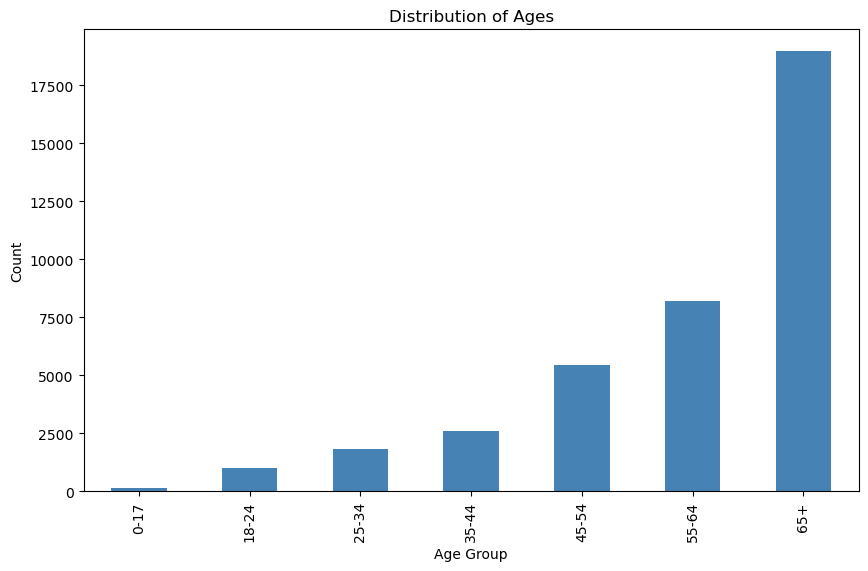

In [113]:
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
ages = clean_diabetes_df['age']
age_groups = pd.cut(ages, bins=age_bins, labels=['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
age_counts = age_groups.value_counts().sort_index()
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='steelblue')
plt.title('Distribution of Ages')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

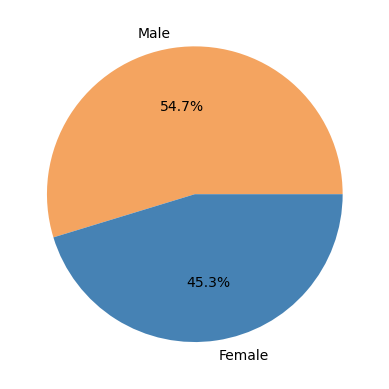

In [71]:
gender_counts = clean_diabetes_df['gender'].value_counts()#.plot(kind='pie', autopct='%1.1f%%')
plt.pie(gender_counts,labels=['Male','Female'],autopct='%.1f%%', colors = ['sandybrown', 'steelblue']);

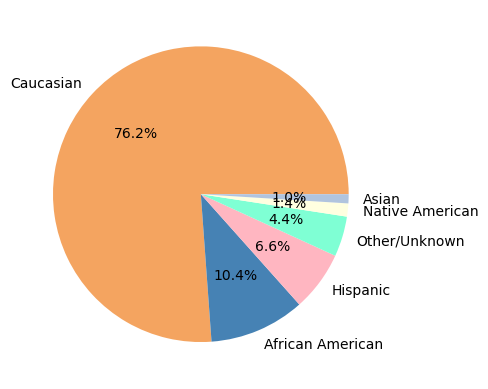

In [77]:
ethnicity_counts = clean_diabetes_df['ethnicity'].value_counts()#.plot(kind='pie', autopct='%1.1f%%')
plt.pie(ethnicity_counts,labels=ethnicity_counts.index,autopct='%.1f%%', colors=['sandybrown', 'steelblue', 'lightpink', 'aquamarine', 'lightyellow', 'lightsteelblue']);

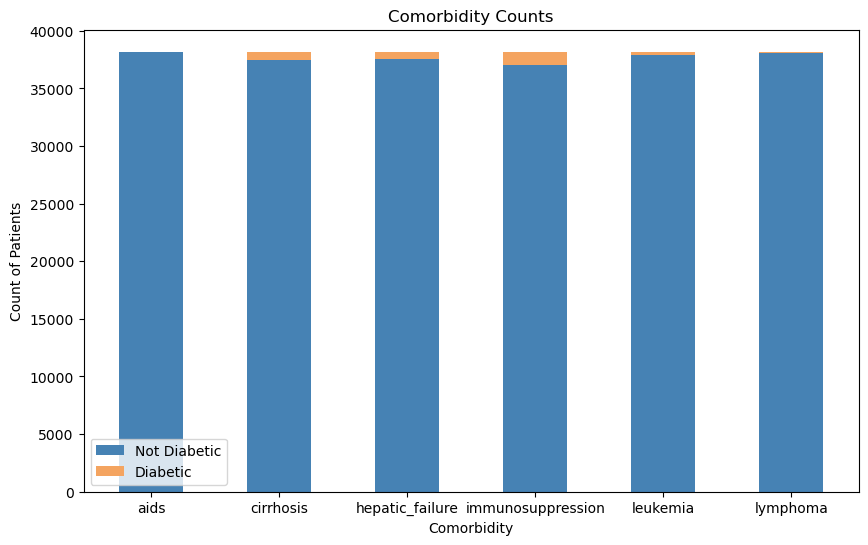

In [106]:
cols = ['aids','cirrhosis','hepatic_failure','immunosuppression','leukemia','lymphoma']
comorbidity_counts = {}
for col in cols:
    # 0 is first, then 1
    comorbidity_counts[col] = clean_diabetes_df[col].value_counts().to_list()

# Extract column names and data
columns = list(comorbidity_counts.keys())
values = list(comorbidity_counts.values())

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(columns, [value[0] for value in values], label="Not Diabetic", width=0.5, color='steelblue')
plt.bar(columns, [value[1] for value in values], label="Diabetic", bottom=[value[0] for value in values], width=0.5, color = 'sandybrown')

# Add labels and title
plt.xlabel("Comorbidity")
plt.ylabel("Count of Patients")
plt.title("Comorbidity Counts")
plt.legend()

# Show the plot
plt.show()

In [91]:
aids_counts

0    38152
1       34
Name: aids, dtype: int64

# Compile, Train, and Evaluate Model

In [52]:
# split preprocessed data
X = final_processed_df.drop(columns=['diabetes_mellitus'])
y = final_processed_df['diabetes_mellitus']

# split further into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
# Model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
# setting initial layer with 90 neurons (~2x # of inputs)
# input_dim is 46 because of the transformed # of input columns after get_dummies
nn.add(tf.keras.layers.Dense(units=90, activation='relu', input_dim=46))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation='relu'))

# Output layer
# use sigmoid activation function here because predicting binary classification
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

a:\Programming\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 90)             │         4,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 40)             │         3,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,911 (30.90 KB)

 Trainable params: 7,911 (30.90 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [55]:
# Train the model
trained = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.7017 - loss: 1.2045
Epoch 2/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.7621 - loss: 0.6075
Epoch 3/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.7516 - loss: 0.6990
Epoch 4/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.7624 - loss: 0.6283
Epoch 5/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.7597 - loss: 0.6175
Epoch 6/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.7712 - loss: 0.5468
Epoch 7/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.7713 - loss: 0.5285
Epoch 8/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.7766 - loss: 0.5159
Epoch 9/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.7827 - loss: 0.4888
Epoch 10/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.7845 - loss: 0.4770
Epoch 11/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.7798 - loss: 0.4882
Epoch 12/100
895/89

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

299/299 - 0s - 647us/step - accuracy: 0.7960 - loss: 0.4528
Loss: 0.45278796553611755, Accuracy: 0.7959568500518799


# Analyze Feature Importance

In [42]:
from scikeras.wrappers import KerasClassifier
from sklearn.inspection import permutation_importance
import numpy as np

In [43]:
# Ensure that nn is defined as your Keras model
# Define the wrapped model (assuming nn is your Keras Sequential model)
wrapped_nn = KerasClassifier(model=nn, epochs=20, batch_size=32, verbose=0)

# Train the wrapped model
wrapped_nn.fit(X_train, y_train)

# Compute permutation importance
result = permutation_importance(wrapped_nn, X_test, y_test, n_repeats=10, random_state=10)

# Get feature importances
importances = result.importances_mean

# Ensure X_test is a DataFrame or convert it
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X_test.columns)

# Sort the features by importance in ascending order (weakest to strongest)
sorted_indices = np.argsort(importances)

# Get the top 20 weakest features
top_20_weakest_indices = sorted_indices[:20]
top_20_weakest_features = X_test.columns[top_20_weakest_indices]
top_20_weakest_importances = importances[top_20_weakest_indices]

# Display the weakest features and their importances
for feature, importance in zip(top_20_weakest_features, top_20_weakest_importances):
    print(f"Weakest feature: {feature} with importance {importance}")

# Saving results:
# Weakest feature: height with importance -0.0016549701476903378
# Weakest feature: heart_rate_apache with importance -0.0008065360846338798
# Weakest feature: apache_post_operative with importance -0.000785587095422613
# Weakest feature: gcs_eyes_apache with importance -0.0005237247302817494
# Weakest feature: intubated_apache with importance -0.00042945427883103184
# Weakest feature: d1_spo2_min with importance -0.0003037603435633751
# Weakest feature: map_apache with importance -0.0002932858489577472
# Weakest feature: d1_temp_max with importance -0.00024091337592957451
# Weakest feature: d1_temp_min with importance -0.00021996438671828544
# Weakest feature: gcs_motor_apache with importance -0.00020948989211266866
# Weakest feature: d1_mbp_max with importance -9.427045145068424e-05
# Weakest feature: d1_heartrate_min with importance -7.332146223941738e-05
# Weakest feature: d1_mbp_min with importance -6.28469676338006e-05
# Weakest feature: ethnicity_Hispanic with importance -5.237247302813941e-05
# Weakest feature: gender_M with importance -3.1423483816872545e-05
# Weakest feature: lymphoma with importance -2.0948989211244663e-05
# Weakest feature: leukemia with importance 4.4408920985006264e-17
# Weakest feature: hepatic_failure with importance 3.1423483816939156e-05
# Weakest feature: ethnicity_Asian with importance 4.189797842257814e-05
# Weakest feature: ethnicity_Native American with importance 8.379595684511187e-05

Weakest feature: apache_2_diagnosis with importance -0.0005237247302818049
Weakest feature: resprate_apache with importance -0.00035613281659162553
Weakest feature: gender_F with importance -0.00028281135435219705
Weakest feature: ethnicity_Asian with importance -0.00016759191369022374
Weakest feature: lymphoma with importance -9.427045145075086e-05
Weakest feature: aids with importance -5.237247302819492e-05
Weakest feature: ethnicity_African American with importance -4.4408920985006264e-17
Weakest feature: cirrhosis with importance 4.1897978422500425e-05
Weakest feature: apache_post_operative with importance 0.00010474494605633433
Weakest feature: immunosuppression with importance 0.00011521944066195111
Weakest feature: gcs_eyes_apache with importance 0.00014664292447884585
Weakest feature: hepatic_failure with importance 0.00014664292447886807
Weakest feature: intubated_apache with importance 0.00026186236514085247
Weakest feature: ethnicity_Hispanic with importance 0.00029328584895

In [44]:
# Wrap your Keras model
wrapped_nn = KerasClassifier(model=nn, epochs=20, batch_size=32, verbose=0)

# Train the wrapped model
wrapped_nn.fit(X_train, y_train)

# Compute permutation importance
result = permutation_importance(wrapped_nn, X_test, y_test, n_repeats=10, random_state=10)

# Get feature importances
importances = result.importances_mean

# Sort the features by importance in descending order (strongest to weakest)
sorted_indices = np.argsort(importances)[::-1]

# Get the top 20 strongest features
top_20_strongest_indices = sorted_indices[:20]
top_20_strongest_features = X_test.columns[top_20_strongest_indices]
top_20_strongest_importances = importances[top_20_strongest_indices]

# Display the strongest features and their importances
for feature, importance in zip(top_20_strongest_features, top_20_strongest_importances):
    print(f"Strongest feature: {feature} with importance {importance}")

# Saving results:
# Strongest feature: d1_glucose_max with importance 0.10093223001990156
# Strongest feature: d1_glucose_min with importance 0.007227401277888346
# Strongest feature: d1_diasbp_max with importance 0.004441185712789364
# Strongest feature: bmi with importance 0.00431549177752173
# Strongest feature: arf_apache with importance 0.004011731433958321
# Strongest feature: apache_3j_diagnosis with importance 0.0038546140148737916
# Strongest feature: glucose_apache with importance 0.003676547606577996
# Strongest feature: weight with importance 0.0021682203833665037
# Strongest feature: intubated_apache with importance 0.0015083272232114919
# Strongest feature: d1_diasbp_min with importance 0.0011312454174086106
# Strongest feature: apache_post_operative with importance 0.0009950769875353483
# Strongest feature: heart_rate_apache with importance 0.0009217555252959087
# Strongest feature: d1_temp_min with importance 0.0008379595684508412
# Strongest feature: d1_heartrate_min with importance 0.0008065360846339243
# Strongest feature: d1_heartrate_max with importance 0.0007751126008170184
# Strongest feature: map_apache with importance 0.0007751126008169962
# Strongest feature: age with importance 0.0007541636116057404
# Strongest feature: d1_sysbp_max with importance 0.0007332146223944736
# Strongest feature: apache_2_diagnosis with importance 0.0007227401277888235
# Strongest feature: ventilated_apache with importance 0.0007122656331831845

Strongest feature: d1_glucose_max with importance 0.10093223001990156
Strongest feature: d1_glucose_min with importance 0.007227401277888346
Strongest feature: d1_diasbp_max with importance 0.004441185712789364
Strongest feature: bmi with importance 0.00431549177752173
Strongest feature: arf_apache with importance 0.004011731433958321
Strongest feature: apache_3j_diagnosis with importance 0.0038546140148737916
Strongest feature: glucose_apache with importance 0.003676547606577996
Strongest feature: weight with importance 0.0021682203833665037
Strongest feature: intubated_apache with importance 0.0015083272232114919
Strongest feature: d1_diasbp_min with importance 0.0011312454174086106
Strongest feature: apache_post_operative with importance 0.0009950769875353483
Strongest feature: heart_rate_apache with importance 0.0009217555252959087
Strongest feature: d1_temp_min with importance 0.0008379595684508412
Strongest feature: d1_heartrate_min with importance 0.0008065360846339243
Strongest

# Re-run Model without 3 strongest features

In [45]:
# split preprocessed data
X = final_processed_df.drop(columns=['d1_glucose_max', 'd1_glucose_min', 'd1_diasbp_max', 'diabetes_mellitus'])
y = final_processed_df['diabetes_mellitus']

# split further into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
# Model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_weak = tf.keras.models.Sequential()

# First hidden layer
# setting initial layer with 90 neurons (~2x # of inputs)
# input_dim is 46 because of the transformed # of input columns after get_dummies
nn_weak.add(tf.keras.layers.Dense(units=90, activation='relu', input_dim=43))

# Second hidden layer
nn_weak.add(tf.keras.layers.Dense(units=40, activation='relu'))

# Output layer
# use sigmoid activation function here because predicting binary classification
nn_weak.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_weak.summary()

a:\Programming\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 90)             │         3,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 40)             │         3,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,641 (29.85 KB)

 Trainable params: 7,641 (29.85 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Compile the model
nn_weak.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [48]:
# Train the model
trained = nn_weak.fit(X_train, y_train, epochs=100)

Epoch 1/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.7151 - loss: 0.9587
Epoch 2/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.7450 - loss: 0.6622
Epoch 3/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.7681 - loss: 0.5411
Epoch 4/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.7638 - loss: 0.5623
Epoch 5/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - accuracy: 0.7623 - loss: 0.5573
Epoch 6/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - accuracy: 0.7716 - loss: 0.5236
Epoch 7/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.7716 - loss: 0.5286
Epoch 8/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.7749 - loss: 0.5075
Epoch 9/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step - accuracy: 0.7791 - loss: 0.4908
Epoch 10/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.7775 - loss: 0.4999
Epoch 11/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.7822 - loss: 0.4902
Epoch 12/100
895/89

In [49]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_weak.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

299/299 - 0s - 687us/step - accuracy: 0.7923 - loss: 0.4779
Loss: 0.47787103056907654, Accuracy: 0.7922907471656799


# Run Model to Understand Effect of Comorbidities

In [58]:
# split preprocessed data
X = final_processed_df.drop(columns=['aids','cirrhosis','hepatic_failure','immunosuppression','leukemia','lymphoma', 'diabetes_mellitus'])
y = final_processed_df['diabetes_mellitus']

# split further into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
# Model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_comorbid = tf.keras.models.Sequential()

# First hidden layer
# setting initial layer with 90 neurons (~2x # of inputs)
# input_dim is 46 because of the transformed # of input columns after get_dummies
nn_comorbid.add(tf.keras.layers.Dense(units=90, activation='relu', input_dim=40))

# Second hidden layer
nn_comorbid.add(tf.keras.layers.Dense(units=40, activation='relu'))

# Output layer
# use sigmoid activation function here because predicting binary classification
nn_comorbid.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_comorbid.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 90)             │         3,690 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 40)             │         3,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,371 (28.79 KB)

 Trainable params: 7,371 (28.79 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Compile the model
nn_comorbid.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [62]:
# Train the model
trained = nn_comorbid.fit(X_train, y_train, epochs=100)

Epoch 1/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.7127 - loss: 1.0332
Epoch 2/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.7545 - loss: 0.6568
Epoch 3/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.7595 - loss: 0.5883
Epoch 4/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.7648 - loss: 0.5829
Epoch 5/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.7823 - loss: 0.5104
Epoch 6/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - accuracy: 0.7710 - loss: 0.5478
Epoch 7/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.7796 - loss: 0.4873
Epoch 8/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.7673 - loss: 0.5357
Epoch 9/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 512us/step - accuracy: 0.7782 - loss: 0.4883
Epoch 10/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.7877 - loss: 0.4617
Epoch 11/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.7812 - loss: 0.4767
Epoch 12/100
895/89

In [63]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_comorbid.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

299/299 - 0s - 725us/step - accuracy: 0.8022 - loss: 0.4480
Loss: 0.44800713658332825, Accuracy: 0.8022415637969971


# Run Keras-Tuner to Tune Model

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=46))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [ ]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [ ]:
# split preprocessed data
X = final_processed_df.drop(columns=['diabetes_mellitus'])
y = final_processed_df['diabetes_mellitus']

# split further into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

# Saving previous output:
# Trial 60 Complete [00h 00m 13s]
# val_accuracy: 0.759924590587616

# Best val_accuracy So Far: 0.7965853214263916
# Total elapsed time: 00h 07m 12s

Trial 60 Complete [00h 00m 13s]
val_accuracy: 0.759924590587616

Best val_accuracy So Far: 0.7965853214263916
Total elapsed time: 00h 07m 12s


In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

# Saving previous output:
# {'activation': 'relu',
#  'first_units': 9,
#  'num_layers': 5,
#  'units_0': 5,
#  'units_1': 3,
#  'units_2': 7,
#  'units_3': 9,
#  'units_4': 7,
#  'units_5': 5,
#  'tuner/epochs': 20,
#  'tuner/initial_epoch': 7,
#  'tuner/bracket': 2,
#  'tuner/round': 2,
#  'tuner/trial_id': '0013'}

{'activation': 'relu',
 'first_units': 9,
 'num_layers': 5,
 'units_0': 5,
 'units_1': 3,
 'units_2': 7,
 'units_3': 9,
 'units_4': 7,
 'units_5': 5,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0013'}

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Saving previous output:
# 299/299 - 0s - 1ms/step - accuracy: 0.7966 - loss: 0.4266
# Loss: 0.42657890915870667, Accuracy: 0.7965853214263916

299/299 - 0s - 1ms/step - accuracy: 0.7966 - loss: 0.4266
Loss: 0.42657890915870667, Accuracy: 0.7965853214263916
